### Reading the data

In [1]:
#importing necessary packages
import numpy as np
import pandas as pd

#reading csv file
df = pd.read_csv('C:/Users/Naveena/Documents/Data Mining/project/graduate-admissions/Admission_Predict.csv')

#displaying first 3 rows of dataset
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


All the features are numerical.
<br> 1. GRE scores: out of 340
<br> 2. TOEFL scores: out of 120
<br> 3. University rating: out of 5
<br> 4. SOP strength: out of 5
<br> 5. LOR strength: out of 5
<br> 6. CGPA: out of 10
<br> 7. Research: either 0 or 1 (no or yes)
<br> 8. Chance of admit: between 0 to 1

### Understanding the data

In [2]:
print('Shape of data is: \n', df.shape)
print('Columns of the data are: \n', df.columns)

Shape of data is: 
 (400, 9)
Columns of the data are: 
 Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


Edit the columns names to make it easier to use
<br> For instance, LOR column has a space and so does Chance of Admit

In [4]:
df.rename(columns = {'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace = True)

### Handling missing values

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Since there are no missing values, there will be no substitution required.

### Descriptive Statistics and Visualization
Create a heatmap of all the features using their correlations

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

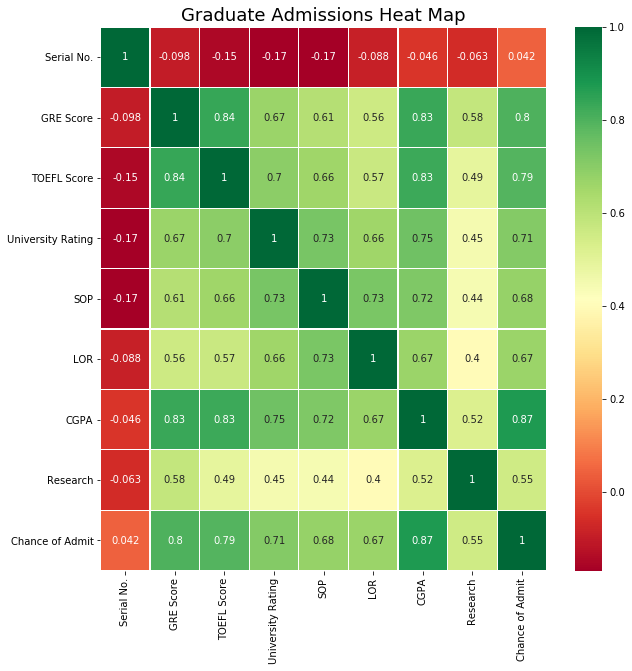

In [5]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), ax = ax, annot = True, linewidths = 0.3, cmap = 'RdYlGn')
plt.title('Graduate Admissions Heat Map', fontsize = 18)
plt.show()
fig.savefig('heatmap_of_all_features.png')

From the heatmap, we can see that CGPA (0.87), GRE score (0.8), TOEFL score (0.79) are the features that are 
highly correlated to Chance of Admit.
<br> However, Research, LOR, and SOP have less significance towards Chance of Admission

<b>CGPA vs Chance of Admit</b>

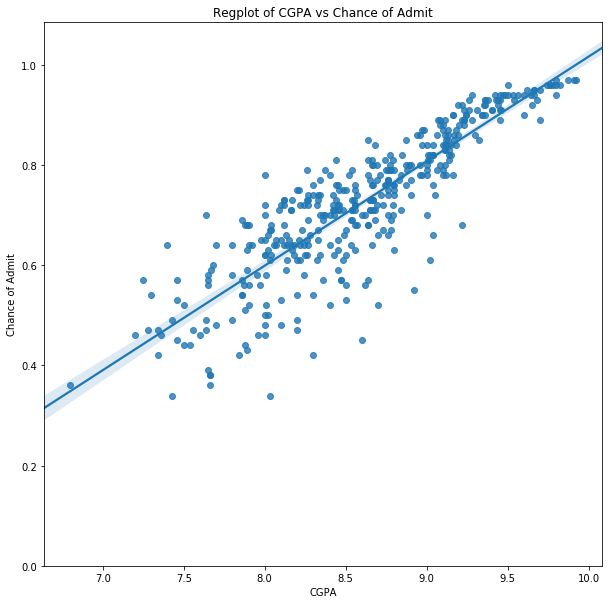

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Regplot of CGPA vs Chance of Admit')
sns.regplot(x = 'CGPA', y = 'Chance of Admit', data = df, ax = ax)
plt.ylim(0,)
fig.savefig('Regplot of CGPA vs Chance of Admit.png')

<b>CGPA vs GRE Score</b>

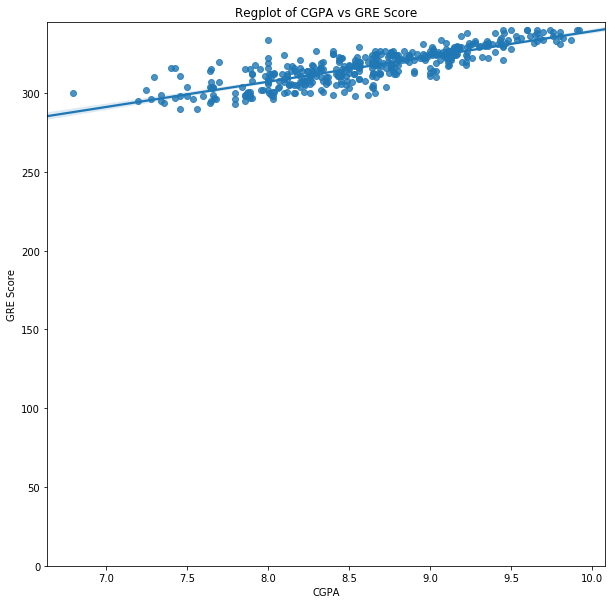

In [7]:
#regression plot for GRE score and Chance of Admit
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Regplot of CGPA vs GRE Score')
sns.regplot(x = 'CGPA', y = 'GRE Score', data = df, ax = ax)
plt.ylim(0,)
fig.savefig('Regplot of CGPA vs GRE Score.png')

<b>TOEFL Score vs Chance of Admit</b>

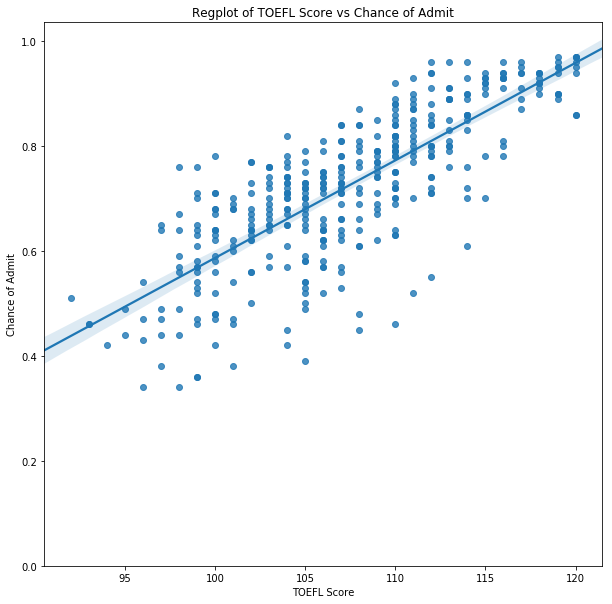

In [9]:
#regression plot for TOEFL score and Chance of Admit
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Regplot of TOEFL Score vs Chance of Admit')
sns.regplot(x = 'TOEFL Score', y = 'Chance of Admit', data = df, ax = ax)
plt.ylim(0,)
fig.savefig('Regplot of TOEFL Score vs Chance of Admit.png')

<b>CGPA vs TOEFL Score</b>

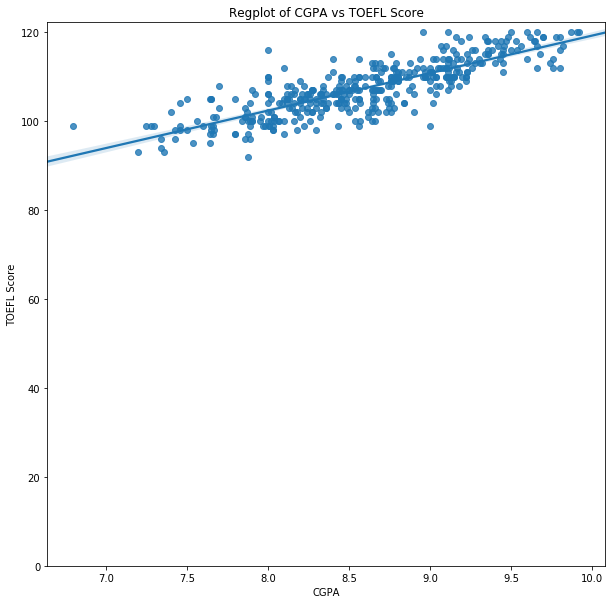

In [10]:
#regression plot for CGPA and TOEFL score
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Regplot of CGPA vs TOEFL Score')
sns.regplot(x = 'CGPA', y = 'TOEFL Score', data = df, ax = ax)
plt.ylim(0,)
fig.savefig('Regplot of CGPA vs TOEFL Score.png')

<b>Data Visualization for the levels of GRE Scores and TOEFL Scores using plotly</b>

In [11]:
import plotly
plotly.tools.set_credentials_file(username='jnk22', api_key='g3FXYcx8sHq7d6ackjKN')
import plotly.plotly as py
import plotly.graph_objs as go

#grouped bar chart for GRE Score and TOEFL Score
x = ['Low', 'Average', 'High']
gre_y = np.array([df['GRE Score'].min(), df['GRE Score'].mean(), df['GRE Score'].max()])
toefl_y = np.array([df['TOEFL Score'].min(), df['TOEFL Score'].mean(), df['TOEFL Score'].max()])

gre_scores = go.Bar(x = x, y = gre_y, text = gre_y, textposition = 'auto', name = 'GRE Scores (out of 340)')
toefl_scores = go.Bar(x = x, y = toefl_y, text = toefl_y, textposition = 'auto', name = 'TOEFL Scores (out of 120)')

data = [gre_scores, toefl_scores]
layout = go.Layout(barmode = 'group', title = 'GRE and TOEFL Scores')

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename='GRE and TOEFL Scores')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jnk22/0 or inside your plot.ly account where it is named 'GRE and TOEFL Scores'


C:\Users\Naveena\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



<b>Research Experience</b>
<br>Let's see how many people have research experience and how many don't have research experience

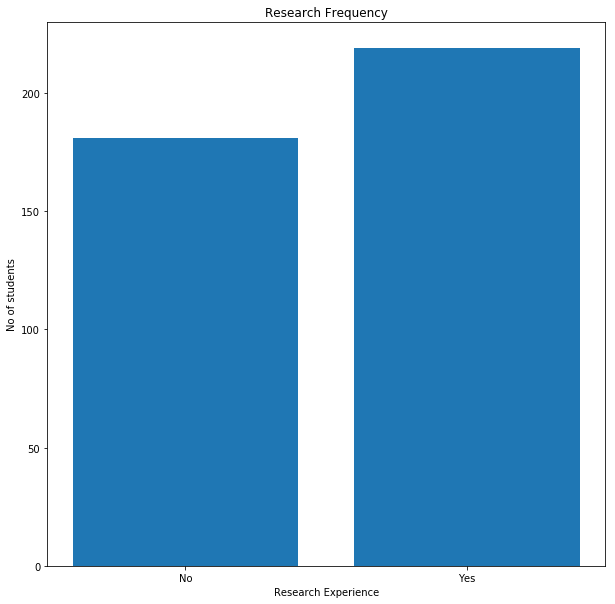

1    219
0    181
Name: Research, dtype: int64


In [12]:
y = np.array([len(df[df['Research'] == 0]), len(df[df['Research'] == 1])])
x = ['No', 'Yes']

fig, ax = plt.subplots(figsize = (10, 10))
plt.bar(x, y)
plt.title('Research Frequency')
plt.xlabel('Research Experience')
plt.ylabel('No of students')
plt.show()
fig.savefig('Research Frequency.png')

print(df['Research'].value_counts())

<b>CGPA vs Chance of Admit with respect to Research Experience</b>

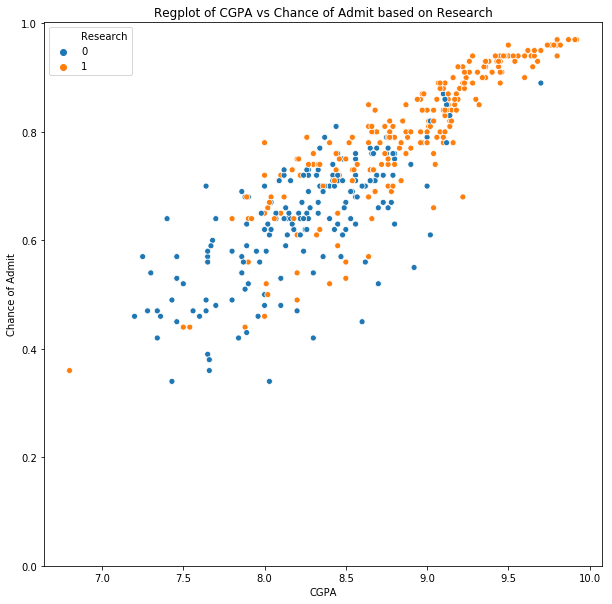

In [13]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Regplot of CGPA vs Chance of Admit based on Research')
sns.scatterplot(x = 'CGPA', y = 'Chance of Admit', data = df, ax = ax, hue = 'Research')
plt.ylim(0,)
fig.savefig('Regplot of CGPA vs Chance of Admit based on Research.png')

<b>GRE Score vs Chance of Admit with respect to Research</b>

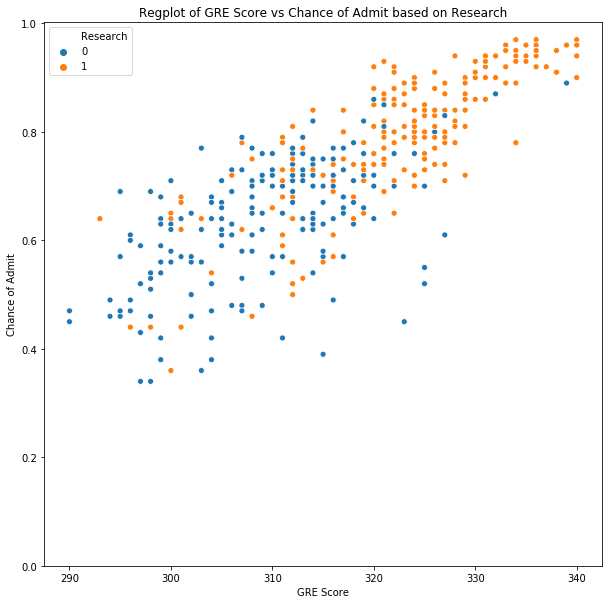

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Regplot of GRE Score vs Chance of Admit based on Research')
sns.scatterplot(x = 'GRE Score', y = 'Chance of Admit', data = df, ax = ax, hue = 'Research')
plt.ylim(0,)
fig.savefig('Regplot of GRE Score vs Chance of Admit based on Research.png')

We can see that students who have CGPA of atleast 8.0 tend to get accepted in universities of rating either 4 or 5

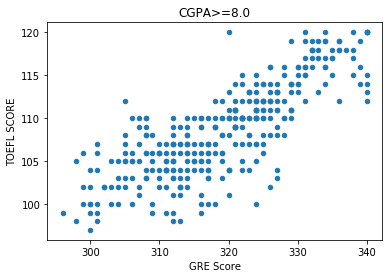

In [15]:
df[df['CGPA'] >= 8.0].plot(kind='scatter', x='GRE Score', y='TOEFL Score')
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.0")
plt.savefig('GRE and TOEFL Scores of CGPA greater than 8.png')
plt.show()

In [16]:
#groupby the mean of chances of admit(ca) and university rating(ur)
df_ca_ur = df[['University Rating', 'Chance of Admit']]
df_ca_ur_group = df_ca_ur.groupby(['University Rating'], as_index = False).mean()
df_ca_ur_group.rename(columns = {'Chance of Admit': 'Average_Chance_of_Admit', 'University Rating': 'University_Rating'}, inplace = True)
df_ca_ur_group

,University_Rating,Average_Chance_of_Admit
0,1,0.548077
1,2,0.625981
2,3,0.711880
3,4,0.818108
4,5,0.888167


### Classification Modeling: Decision Tree and Random Forest

#### Preprocessing the data

In [17]:
ca_bins = np.linspace(min(df['Chance of Admit']), max(df['Chance of Admit']), 4)
ca_labels = ['Low', 'Medium', 'High']
df['Chance of Admit Bins'] = pd.cut(df['Chance of Admit'], ca_bins, labels = ca_labels, include_lowest = True)
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Bins
0,1,337,118,4,4.5,4.5,9.65,1,0.92,High
1,2,324,107,4,4.0,4.5,8.87,1,0.76,Medium
2,3,316,104,3,3.0,3.5,8.00,1,0.72,Medium


<b>Import all the required packages</b>

In [18]:
#import required packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [19]:
#assign the data frames
x = df[:]
x.drop(['Serial No.', 'Chance of Admit', 'Chance of Admit Bins'], axis = 1, inplace = True)
print('Data Frame x(independent variables): \n', x.head(3))

y = df[['Chance of Admit Bins']]
print('Data Frame y(dependent variable): \n', y.head(3))

#normalize the data
scalerX = MinMaxScaler(feature_range=(0, 1))
x_scaled = scalerX.fit_transform(x)

Data Frame x(independent variables): 
    GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
0        337          118                  4  4.5  4.5  9.65         1
1        324          107                  4  4.0  4.5  8.87         1
2        316          104                  3  3.0  3.5  8.00         1
Data Frame y(dependent variable): 
   Chance of Admit Bins
0                 High
1               Medium
2               Medium


C:\Users\Naveena\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



<b>Applying 10-Fold Cross Validation: Decision Tree</b>

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Cross Validated Scores:  [0.725 0.7   0.675 0.6   0.825 0.775 0.65  0.65  0.6   0.725]
Average of the scores:  0.6924999999999999
Cross Validated predictions:  ['High' 'High' 'Low' 'Medium' 'Medium']
F1 score:  [0.77460317 0.37623762 0.67708333]
Precision:  [0.78709677 0.37254902 0.67010309]
Recall:  [0.7625     0.38       0.68421053]
Accuracy:  0.6775


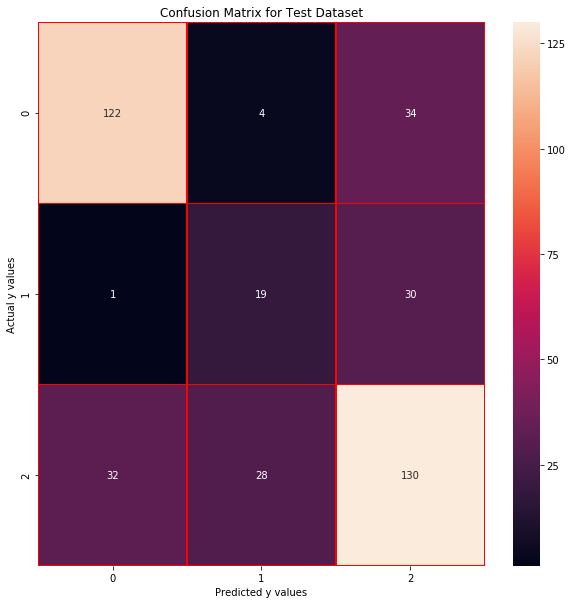

In [20]:
#Call the Decision Tree Classification
dtc = DecisionTreeClassifier()
print(dtc)

#Apply 10 folds
scores_dtc = cross_val_score(dtc, x_scaled, y, cv = 10)
print('Cross Validated Scores: ', scores_dtc)
print('Average of the scores: ', np.mean(scores_dtc))

#predicting data
predictions_dtc = cross_val_predict(dtc, x_scaled, y, cv = 10)
print('Cross Validated predictions: ', predictions_dtc[0:5])

#Calculating accuracy, f1 score, precision score, and recall score
print('F1 score: ', f1_score(y, predictions_dtc, average = None))
print('Precision: ', precision_score(y, predictions_dtc, average = None))
print('Recall: ', recall_score(y, predictions_dtc, average = None))
print('Accuracy: ', accuracy_score(y, predictions_dtc))

#Visualizing confusion matrix
dtc_cm = confusion_matrix(y, predictions_dtc)
fig, ax = plt.subplots(figsize =(10, 10))
sns.heatmap(dtc_cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for Test Dataset")
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

<b>Applying 10-Fold Cross Validation: Random Forest</b>

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena

Cross Validated Scores:  [0.775 0.7   0.725 0.725 0.875 0.75  0.775 0.875 0.625 0.75 ]
Average of the scores:  0.7575


C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena

Cross Validated predictions:  ['High' 'High' 'Medium' 'High' 'Medium']
F1 score:  [0.82692308 0.4691358  0.76658477]
Precision:  [0.84868421 0.61290323 0.71889401]
Recall:  [0.80625    0.38       0.82105263]
Accuracy:  0.76


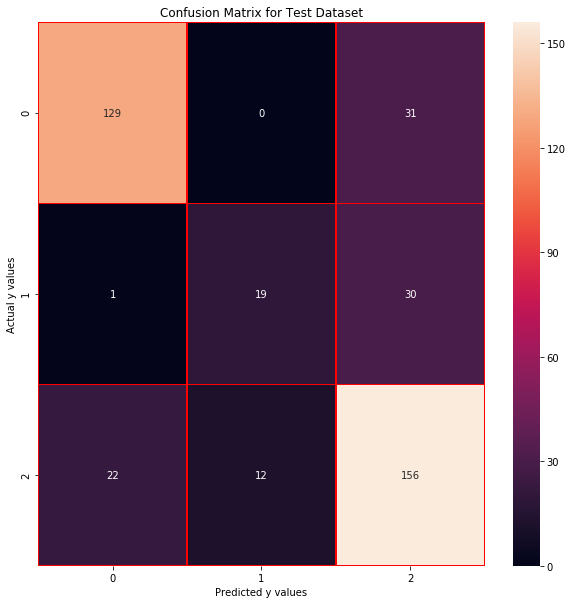

In [21]:
#Call the Decision Tree Classification
rfc = RandomForestClassifier(n_estimators = 100)
print(rfc)

#Apply 10 folds
scores_rfc = cross_val_score(rfc, x_scaled, y, cv = 10)
print('Cross Validated Scores: ', scores_rfc)
print('Average of the scores: ', np.mean(scores_rfc))

#predicting data
predictions_rfc = cross_val_predict(rfc, x_scaled, y, cv = 10)
print('Cross Validated predictions: ', predictions_rfc[0:5])

#Calculating accuracy, f1 score, precision score, and recall score
print('F1 score: ', f1_score(y, predictions_rfc, average = None))
print('Precision: ', precision_score(y, predictions_rfc, average = None))
print('Recall: ', recall_score(y, predictions_rfc, average = None))
print('Accuracy: ', accuracy_score(y, predictions_rfc))

#Visualizing confusion matrix
rfc_cm = confusion_matrix(y, predictions_rfc)
fig, ax = plt.subplots(figsize =(10, 10))
sns.heatmap(rfc_cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for Test Dataset")
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

<b>Applying 10-Fold Cross Validation for top 3 features: Random Forest</b>

C:\Users\Naveena\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Data Frame x(independent variables): 
    GRE Score  TOEFL Score  CGPA
0        337          118  9.65
1        324          107  8.87
2        316          104  8.00
Data Frame y(dependent variable): 
   Chance of Admit Bins
0                 High
1               Medium
2               Medium
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena

Cross Validated Scores:  [0.775 0.75  0.75  0.75  0.875 0.75  0.775 0.85  0.7   0.725]
Average of the scores:  0.77


C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:850: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Naveena

Cross Validated predictions:  ['High' 'High' 'Medium' 'High' 'Medium']
F1 score:  [0.83601286 0.48837209 0.77419355]
Precision:  [0.86092715 0.58333333 0.73239437]
Recall:  [0.8125     0.42       0.82105263]
Accuracy:  0.7675


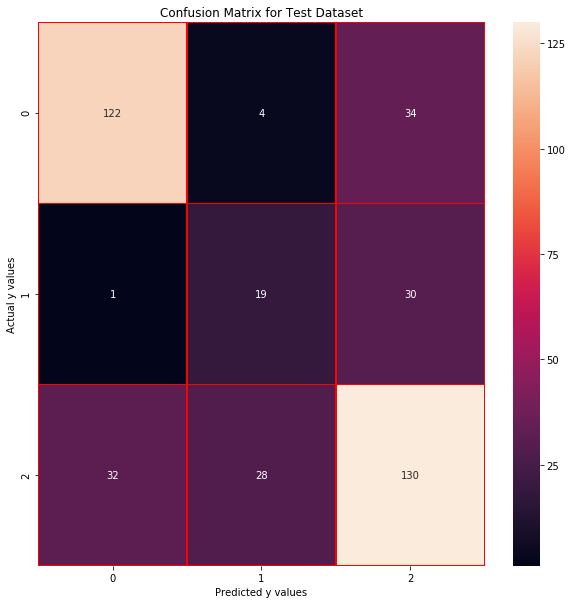

In [22]:
#assign the data frames
x_top3 = df[:]
x_top3.drop(['Serial No.', 'Chance of Admit', 'Chance of Admit Bins', 'LOR', 'SOP', 'University Rating', 'Research'], axis = 1, inplace = True)
print('Data Frame x(independent variables): \n', x_top3.head(3))

y_top3 = df[['Chance of Admit Bins']]
print('Data Frame y(dependent variable): \n', y_top3.head(3))

#normalize the data
scalerX_top3 = MinMaxScaler(feature_range=(0, 1))
x_scaled_top3 = scalerX_top3.fit_transform(x_top3)

#Call the Decision Tree Classification
rfc_top3 = RandomForestClassifier(n_estimators = 100)
print(rfc_top3)

#Apply 10 folds
scores_rfc_top3 = cross_val_score(rfc_top3, x_scaled_top3, y_top3, cv = 10)
print('Cross Validated Scores: ', scores_rfc_top3)
print('Average of the scores: ', np.mean(scores_rfc_top3))

#predicting data
predictions_rfc_top3 = cross_val_predict(rfc_top3, x_scaled_top3, y_top3, cv = 10)
print('Cross Validated predictions: ', predictions_rfc_top3[0:5])

#Calculating accuracy, f1 score, precision score, and recall score
print('F1 score: ', f1_score(y, predictions_rfc_top3, average = None))
print('Precision: ', precision_score(y, predictions_rfc_top3, average = None))
print('Recall: ', recall_score(y, predictions_rfc_top3, average = None))
print('Accuracy: ', accuracy_score(y, predictions_rfc_top3))

#Visualizing confusion matrix
rfc_top3_cm = confusion_matrix(y, predictions_rfc_top3)
fig, ax = plt.subplots(figsize =(10, 10))
sns.heatmap(dtc_cm, annot = True, linewidths=0.5, linecolor="red", fmt = ".0f", ax=ax)
plt.title("Confusion Matrix for Test Dataset")
plt.xlabel("Predicted y values")
plt.ylabel("Actual y values")
plt.show()

### Comparing the algorithms

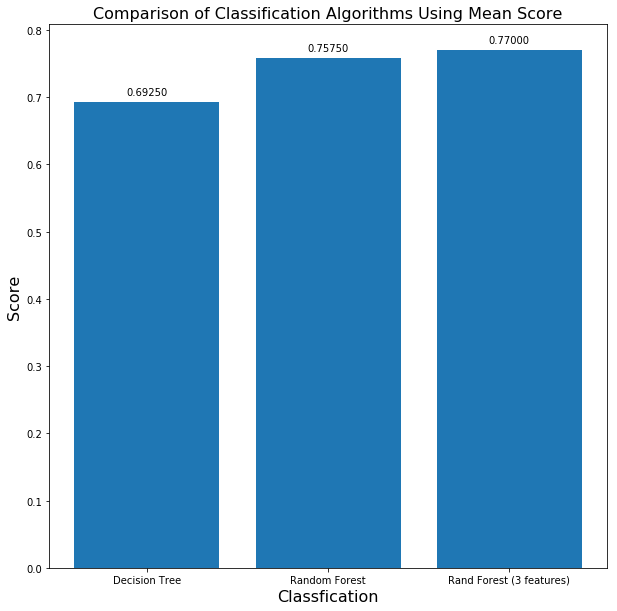

In [23]:
y_axis = np.array([np.mean(scores_dtc), np.mean(scores_rfc), np.mean(scores_rfc_top3)])
x_axis = ["Decision Tree","Random Forest", "Rand Forest (3 features)"]
fig, ax = plt.subplots(figsize = (10, 10))
ax1 = plt.bar(x_axis, y_axis)
plt.title("Comparison of Classification Algorithms Using Mean Score", fontsize = 16)
plt.xlabel("Classfication", fontsize = 16)
plt.ylabel("Score", fontsize = 16)

def add_value_labels(ax1, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.5f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax1)
fig.savefig('Comparison of Classification Algorithms Using Accuracy.png')
plt.show()